In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("cement_slump.csv")

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


<Axes: >

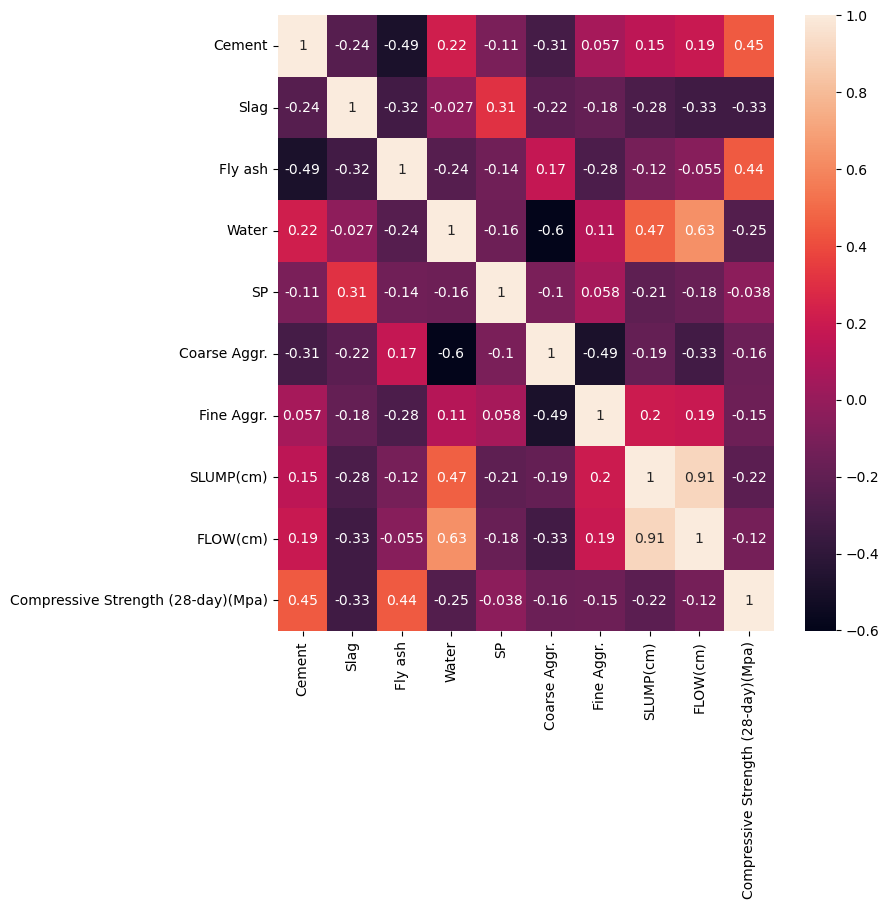

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [8]:
X=df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y=df['Compressive Strength (28-day)(Mpa)']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()
sc_X_train=scaler.fit_transform(X_train)
sc_X_test=scaler.transform(X_test)

In [13]:
from sklearn.svm import SVR,LinearSVR

In [15]:
#help(SVR)

In [16]:
model=SVR()

In [18]:
model.fit(sc_X_train,y_train)

SVR()

In [19]:
y_pred=model.predict(sc_X_test)

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
mean_absolute_error(y_test,y_pred)

5.236902091259179

In [22]:
np.sqrt(mean_squared_error(y_test,y_pred))

6.695914838327133

In [23]:
y_test.mean()

36.26870967741935

In [26]:
param_grid={"C":[0.001,0.01,0.1,0.5,1],
            'kernel':['linear','rbf','poly'],
            'gamma':['scale','auto'],
            'degree':[2,3,4],
           'epsilon':[0,0.01,0.1,0.5,1,2]}

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
svr=SVR()

In [29]:
grid=GridSearchCV(svr,param_grid,cv=5)

In [30]:
grid.fit(sc_X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [31]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [32]:
grid_pred=grid.predict(sc_X_test)

In [33]:
mean_absolute_error(y_test,grid_pred)

2.512801221076198

In [34]:
np.sqrt(mean_squared_error(y_test,grid_pred))

3.1782103051198347